# Generate consensus gene sets based on other immune cells estimation methods and TCGA HGSOC tumour cellularity

Script related to figures 3a-d, 3h, s3b-f, 5e, s5e-f, 6a-b, s6a-b, s7b, s7d-e 

### Aim:
- Generate consensus tumour microenvironment gene sets based on other immune cell estimation methods (CIBERSORT, Bindea, Davoli, xCELL, MCP_counter, TIMER, Danaher) and immune and stromal related genes with significant -0.2 negative Pearson's and Spearman's (respectively) correlation with tumour cellularity

## Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats.mstats import zscore

In [2]:
home = "~/git_repos/HGSOC_TME_Heterogeneity/"

## Get genes for each method

### Bindea genes

In [3]:
bin_genes = home + 'Data/3/BindeaImmuneCells_GeneSets.txt'

bin_genes = pd.read_csv(bin_genes,
                        sep='\t')

In [4]:
bin_genes.head()

,activated_Dendritic_cells,B_cells,CD8_T_cells,Citotoxic_cells,Dendritic_cells,Eosinophils,immature_Dendritic_cells,Macrophages,Mast_cells,Neutrophils,...,T_central_memory_cells,T_effector_memory_cells,T_follicular_helper_cells,T_gamma_delta_cells,Th1_cells,Th17_cells,Th2_cells,Treg_cells,Angiogenesis,Antigen_presentation_machinery
0,CCL1,ABCB4,ABT1,APBA2,CCL13,ABHD2,ABCG2,APOE,ABCC4,ALPL,...,AQP3,AKT3,B3GAT1,C1orf61,APBB2,IL17A,ADCY1,FOXP3,CDH5,HLA-A
1,EBI3,BACH2,AES,APOL3,CCL17,ACACB,BLVRB,ATG7,ADCYAP1,BST1,...,ATF7IP,C7orf54,BLR1,CD160,APOD,IL17RA,AHI1,NaN,ELTD1,HLA-B
2,INDO,BCL11A,APBA2,CTSW,CCL22,C9orf156,CARD9,BCAT1,CALB2,CD93,...,ATM,CCR2,C18orf1,FEZ1,ATP9A,RORC,ANK1,NaN,CLEC14A,HLA-C
3,LAMP3,BLK,ARHGAP8,DUSP2,CD209,CAT,CD1A,CCL7,CEACAM8,CEACAM3,...,CASP8,DDX17,CDK5R1,TARP,BST2,NaN,BIRC5,NaN,LDB2,B2M
4,OAS3,BLNK,C12orf47,GNLY,HSD11B1,CCR3,CD1B,CD163,CMA1,CREB5,...,CDC14A,EWSR1,CHGB,TRD,BTG3,NaN,CDC25C,NaN,ECSCR,TAP1


In [5]:
bin_genes.columns.values

array(['activated_Dendritic_cells', 'B_cells', 'CD8_T_cells',
       'Citotoxic_cells', 'Dendritic_cells', 'Eosinophils',
       'immature_Dendritic_cells', 'Macrophages', 'Mast_cells',
       'Neutrophils', 'NK_CD56bright_cells', 'NK_CD56dim_cells',
       'NK_cells', 'plasmacytoid_Dendritic_cells', 'T_cells',
       'T_helper_cells', 'T_central_memory_cells',
       'T_effector_memory_cells', 'T_follicular_helper_cells',
       'T_gamma_delta_cells', 'Th1_cells', 'Th17_cells', 'Th2_cells',
       'Treg_cells', 'Angiogenesis', 'Antigen_presentation_machinery'],
      dtype=object)

#### Define cell types

In [6]:
b_cells     = ['B_cells']
dendritic   = ['activated_Dendritic_cells',
               'Dendritic_cells',
               'immature_Dendritic_cells',
               'plasmacytoid_Dendritic_cells']
eosinophils = ['Eosinophils']
macrophages = ['Macrophages']
mast        = ['Mast_cells']
nk          = ['NK_cells',
               'NK_CD56bright_cells',
               'NK_CD56dim_cells']
neutrophils = ['Neutrophils']
cd4         = ['T_helper_cells']
cd8         = ['CD8_T_cells']
cytotoxic   = ['Citotoxic_cells']
tgd         = ['T_gamma_delta_cells']
tregs       = ['Treg_cells']

#### Merge columns according to cell type

In [7]:
bcell = [g for l in bin_genes[b_cells].values.tolist() for g in l if str(g) != 'nan']
dendr = [g for l in bin_genes[dendritic].values.tolist() for g in l if str(g) != 'nan']
eosin = [g for l in bin_genes[eosinophils].values.tolist() for g in l if str(g) != 'nan']
macro = [g for l in bin_genes[macrophages].values.tolist() for g in l if str(g) != 'nan']
mast  = [g for l in bin_genes[mast].values.tolist() for g in l if str(g) != 'nan']
nk    = [g for l in bin_genes[nk].values.tolist() for g in l if str(g) != 'nan']
neutr = [g for l in bin_genes[neutrophils].values.tolist() for g in l if str(g) != 'nan']
cd4   = [g for l in bin_genes[cd4].values.tolist() for g in l if str(g) != 'nan']
cd8   = [g for l in bin_genes[cd8].values.tolist() for g in l if str(g) != 'nan']
cytot = [g for l in bin_genes[cytotoxic].values.tolist() for g in l if str(g) != 'nan']
tgd   = [g for l in bin_genes[tgd].values.tolist() for g in l if str(g) != 'nan']
tregs = [g for l in bin_genes[tregs].values.tolist() for g in l if str(g) != 'nan']

In [8]:
bin_sigs_dict = {'B_cells':sorted(set(bcell)),
                 'Dendritic_cells':sorted(set(dendr)),
                 'Eosinophils':sorted(set(eosin)),
                 'Macrophages':sorted(set(macro)),
                 'Mast_cells':sorted(set(mast)),
                 'NK_cells':sorted(set(nk)),
                 'Neutrophils':sorted(set(neutr)),
                 'T_cells_CD4':sorted(set(cd4)),
                 'T_cells_CD8':sorted(set(cd8)),
                 'Cytotoxic_cells':sorted(set(cytot)),                 
                 'T_cells_gamma_delta':sorted(set(tgd)),
                 'T_regulatory_cells':sorted(set(tregs))}

In [9]:
bin_sigs_df = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in bin_sigs_dict.items()]))

In [10]:
bin_sigs_df.head()

,B_cells,Dendritic_cells,Eosinophils,Macrophages,Mast_cells,NK_cells,Neutrophils,T_cells_CD4,T_cells_CD8,Cytotoxic_cells,T_cells_gamma_delta,T_regulatory_cells
0,ABCB4,ABCG2,ABHD2,APOE,ABCC4,ADARB1,ALPL,ANP32B,ABT1,APBA2,C1orf61,FOXP3
1,BACH2,BLVRB,ACACB,ATG7,ADCYAP1,AF107846,BST1,ASF1A,AES,APOL3,CD160,NaN
2,BCL11A,CARD9,C9orf156,BCAT1,CALB2,ALDH1B1,CD93,ATF2,APBA2,CTSW,FEZ1,NaN
3,BLK,CCL1,CAT,CCL7,CEACAM8,APBB2,CEACAM3,BATF,ARHGAP8,DUSP2,TARP,NaN
4,BLNK,CCL13,CCR3,CD163,CMA1,ATL2,CREB5,C13orf34,C12orf47,GNLY,TRD,NaN


### Davoli genes

In [11]:
dav_genes = home + 'Data/3/DavoliImmuneCells_GeneSets.txt'

dav_genes = pd.read_csv(dav_genes,
                        sep='\t')

In [12]:
dav_genes.head()

,CD4_mature,CD8_effector,NK_cells,B_cells,T_regs,Dendritics,CD8_effector_NK_cells,Macrophages,Macrophages_M2,Macrophages_M1
0,IGFBP4,GZMK,NKG7,BANK1,IL2RA,NR4A3,NKG7,CD5L,HRH1,CD40
1,ITM2A,CD3E,GZMA,CD79A,FOXP3,HAVCR2,CCL5,FCGR3A,NPL,CXCL10
2,AMIGO2,CD3G,EOMES,CD55,CTLA4,KMO,KLRK1,ITGB5,PDCD1LG2,CXCL11
3,TRAT1,CXCR3,SAMD3,CD19,SLC35D1,DNASE1L3,CCR5,MERTK,RENBP,CXCL9
4,CD40LG,CD3D,TBX21,CD79B,GDPD3,ANPEP,CXCR6,PILRA,CFP,SLAMF1


In [13]:
dav_genes.columns.values

array(['CD4_mature', 'CD8_effector', 'NK_cells', 'B_cells', 'T_regs',
       'Dendritics', 'CD8_effector_NK_cells', 'Macrophages',
       'Macrophages_M2', 'Macrophages_M1'], dtype=object)

#### Define cell types

In [14]:
b_cells     = ['B_cells']
dendritic   = ['Dendritics']
macrophages = ['Macrophages']
m1          = ['Macrophages_M1']
m2          = ['Macrophages_M2']
nk          = ['NK_cells', 'CD8_effector_NK_cells']
cd4         = ['CD4_mature']
cd8         = ['CD8_effector']
tregs       = ['T_regs']

#### Merge columns according to cell type

In [15]:
bcell = [g for l in dav_genes[b_cells].values.tolist() for g in l if str(g) != 'nan']
dendr = [g for l in dav_genes[dendritic].values.tolist() for g in l if str(g) != 'nan']
macro = [g for l in dav_genes[macrophages].values.tolist() for g in l if str(g) != 'nan']
m1    = [g for l in dav_genes[m1].values.tolist() for g in l if str(g) != 'nan']
m2    = [g for l in dav_genes[m2].values.tolist() for g in l if str(g) != 'nan']
nk    = [g for l in dav_genes[nk].values.tolist() for g in l if str(g) != 'nan']
cd4   = [g for l in dav_genes[cd4].values.tolist() for g in l if str(g) != 'nan']
cd8   = [g for l in dav_genes[cd8].values.tolist() for g in l if str(g) != 'nan']
tregs = [g for l in dav_genes[tregs].values.tolist() for g in l if str(g) != 'nan']

In [16]:
dav_sigs_dict = {'B_cells':sorted(set(bcell)),
                 'Dendritic_cells':sorted(set(dendr)),
                 'Macrophages':sorted(set(macro)),
                 'Macrophages_M1':sorted(set(m1)),
                 'Macrophages_M2':sorted(set(m2)),
                 'NK_cells':sorted(set(nk)),
                 'T_cells_CD4':sorted(set(cd4)),
                 'T_cells_CD8':sorted(set(cd8)),
                 'T_regulatory_cells':sorted(set(tregs))}

In [17]:
dav_sigs_df = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in dav_sigs_dict.items()]))

In [18]:
dav_sigs_df.head()

,B_cells,Dendritic_cells,Macrophages,Macrophages_M1,Macrophages_M2,NK_cells,T_cells_CD4,T_cells_CD8,T_regulatory_cells
0,BANK1,ANPEP,C1QA,C1QA,C1QA,CCL5,AMIGO2,BCL11B,CISH
1,CD19,CXCL16,C1QB,C1QB,C1QB,CCR5,CD40LG,CD28,CTLA4
2,CD55,DNASE1L3,C1QC,C1QC,C1QC,CHSY1,ICOS,CD3D,FOXP3
3,CD79A,HAVCR2,CCL8,CCL8,CCL8,CRTAM,IGFBP4,CD3E,GDPD3
4,CD79B,KMO,CD5L,CD40,CD5L,CXCR6,ITM2A,CD3G,IL2RA


### MCP counter genes

In [19]:
mcp_genes = home + 'Data/3/MCPcounterImmuneCell_GeneSets.txt'

mcp_genes = pd.read_csv(mcp_genes,
                        sep='\t')

In [20]:
mcp_genes.head()

,HUGO_symbols,Cell_population,ENTREZ_ID
0,CD28,T cells,940
1,CD3D,T cells,915
2,CD3G,T cells,917
3,CD5,T cells,921
4,CD6,T cells,923


In [21]:
mcp_cells = set(mcp_genes['Cell_population'])

mcp_dict = {cell:[] for cell in mcp_cells}

In [22]:
mcp_dict

{'B lineage': [],
 'CD8 T cells': [],
 'Cytotoxic lymphocytes': [],
 'Endothelial cells': [],
 'Fibroblasts': [],
 'Monocytic lineage': [],
 'Myeloid dendritic cells': [],
 'NK cells': [],
 'Neutrophils': [],
 'T cells': []}

In [23]:
for i in mcp_genes.index:
    
    cell_type = mcp_genes['Cell_population'][i]
    gene      = mcp_genes['HUGO_symbols'][i]
    
    if gene not in mcp_dict[cell_type]:
        mcp_dict[cell_type].append(gene)
    else:
        raise ValueError()

In [24]:
mcp_genes = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in mcp_dict.items()]))

In [25]:
mcp_genes.head()

,Monocytic lineage,Fibroblasts,Neutrophils,B lineage,NK cells,CD8 T cells,Myeloid dendritic cells,T cells,Cytotoxic lymphocytes,Endothelial cells
0,ADAP2,COL1A1,CA4,BANK1,CD160,CD8B,CD1A,CD28,CD8A,ACVRL1
1,CSF1R,COL3A1,CEACAM3,CD19,KIR2DL1,NaN,CD1B,CD3D,EOMES,APLN
2,FPR3,COL6A1,CXCR1,CD22,KIR2DL3,NaN,CD1E,CD3G,FGFBP2,BCL6B
3,KYNU,COL6A2,CXCR2,CD79A,KIR2DL4,NaN,CLEC10A,CD5,GNLY,BMP6
4,PLA2G7,DCN,CYP4F3,CR2,KIR3DL1,NaN,CLIC2,CD6,KLRC3,BMX


In [26]:
mcp_genes.columns.values

array(['Monocytic lineage', 'Fibroblasts', 'Neutrophils', 'B lineage',
       'NK cells', 'CD8 T cells', 'Myeloid dendritic cells', 'T cells',
       'Cytotoxic lymphocytes', 'Endothelial cells'], dtype=object)

#### Define cell types

In [27]:
b_cells     = ['B lineage']
dendritic   = ['Myeloid dendritic cells']
nk          = ['NK cells']
neutrophils = ['Neutrophils']
cd8         = ['CD8 T cells']
cytotoxic   = ['Cytotoxic lymphocytes']
fibroblast  = ['Fibroblasts']
endothelial = ['Endothelial cells']

#### Merge columns according to cell type

In [28]:
bcell = [g for l in mcp_genes[b_cells].values.tolist() for g in l if str(g) != 'nan']
dendr = [g for l in mcp_genes[dendritic].values.tolist() for g in l if str(g) != 'nan']
nk    = [g for l in mcp_genes[nk].values.tolist() for g in l if str(g) != 'nan']
neutr = [g for l in mcp_genes[neutrophils].values.tolist() for g in l if str(g) != 'nan']
cd8   = [g for l in mcp_genes[cd8].values.tolist() for g in l if str(g) != 'nan']
cytot = [g for l in mcp_genes[cytotoxic].values.tolist() for g in l if str(g) != 'nan']
fibro = [g for l in mcp_genes[fibroblast].values.tolist() for g in l if str(g) != 'nan']
endot = [g for l in mcp_genes[endothelial].values.tolist() for g in l if str(g) != 'nan']

In [29]:
mcp_sigs_dict = {'B_cells':sorted(set(bcell)),
                 'Dendritic_cells':sorted(set(dendr)),
                 'NK_cells':sorted(set(nk)),
                 'Neutrophils':sorted(set(neutr)),
                 'T_cells_CD8':sorted(set(cd8)),
                 'Cytotoxic_cells':sorted(set(cytot)),
                 'Fibroblasts':sorted(set(fibro)),
                 'Endothelial':sorted(set(endot))}

In [30]:
mcp_sigs_df = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in mcp_sigs_dict.items()]))

In [31]:
mcp_sigs_df.head()

,B_cells,Dendritic_cells,NK_cells,Neutrophils,T_cells_CD8,Cytotoxic_cells,Fibroblasts,Endothelial
0,BANK1,CD1A,CD160,CA4,CD8B,CD8A,COL1A1,ACVRL1
1,CD19,CD1B,KIR2DL1,CEACAM3,NaN,EOMES,COL3A1,APLN
2,CD22,CD1E,KIR2DL3,CXCR1,NaN,FGFBP2,COL6A1,BCL6B
3,CD79A,CLEC10A,KIR2DL4,CXCR2,NaN,GNLY,COL6A2,BMP6
4,CR2,CLIC2,KIR3DL1,CYP4F3,NaN,KLRC3,DCN,BMX


### CIBERSORT genes

In [32]:
cib_genes = home + 'Data/3/LM22.txt'

cib_genes = pd.read_csv(cib_genes,
                        sep='\t',
                        index_col='Gene symbol')

In [33]:
cib_genes.head()

,B cells naive,B cells memory,Plasma cells,T cells CD8,T cells CD4 naive,T cells CD4 memory resting,T cells CD4 memory activated,T cells follicular helper,T cells regulatory (Tregs),T cells gamma delta,...,Monocytes,Macrophages M0,Macrophages M1,Macrophages M2,Dendritic cells resting,Dendritic cells activated,Mast cells resting,Mast cells activated,Eosinophils,Neutrophils
Gene symbol,,,,,,,,,,,,,,,,,,,,,
ABCB4,555.713449,10.744235,7.225819,4.311280,4.605860,7.406442,8.043976,6.469993,7.833082,9.312295,...,6.202496,7.951360,27.557710,121.432277,114.636747,4.872184,4.727985,34.113659,15.030530,14.906888
ABCB9,15.603544,22.094787,653.392328,24.223723,35.671507,30.048192,38.455423,17.604795,46.073657,19.715722,...,20.309426,56.251887,29.380878,40.390260,123.993305,23.384603,53.466757,23.615746,29.786442,33.679147
ACAP1,215.305951,321.621021,38.616872,1055.613378,1790.097170,922.152747,340.883424,1107.798265,1995.482601,280.075719,...,190.879024,48.972217,30.974254,23.055150,61.386550,26.412923,104.200198,73.607932,696.442802,596.025961
ACHE,15.117949,16.648847,22.123737,13.428288,27.187732,18.444927,13.441268,14.805542,24.652712,33.658448,...,16.375268,13.692963,1373.069620,48.585761,16.715474,193.159977,13.948778,20.501249,40.414927,22.766494
ACP5,605.897384,1935.201479,1120.104684,306.312519,744.656599,557.819820,248.546932,711.949744,958.916018,493.969120,...,512.931382,13644.172300,1062.475909,7633.960182,13825.053630,3989.865169,263.497930,323.381277,860.563374,307.142798


#### Check CIBERSORT gene weights' matrix

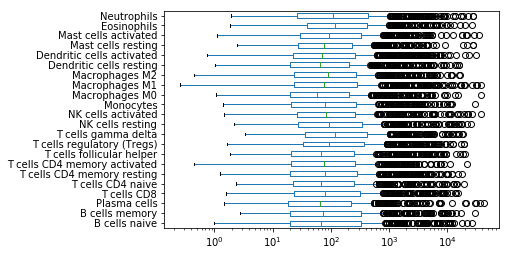

In [34]:
cib_genes.plot(kind='box',
               logx=True,
               vert=False)

### Select CIBERSORT genes whose weights' are > 1.96 sd from the mean of each cell type

#### Standardise weights within cell type

In [35]:
cib_genes_zscore = (cib_genes - cib_genes.mean()) / cib_genes.std()

In [36]:
cib_genes_zscore.head()

,B cells naive,B cells memory,Plasma cells,T cells CD8,T cells CD4 naive,T cells CD4 memory resting,T cells CD4 memory activated,T cells follicular helper,T cells regulatory (Tregs),T cells gamma delta,...,Monocytes,Macrophages M0,Macrophages M1,Macrophages M2,Dendritic cells resting,Dendritic cells activated,Mast cells resting,Mast cells activated,Eosinophils,Neutrophils
Gene symbol,,,,,,,,,,,,,,,,,,,,,
ABCB4,-0.090584,-0.301596,-0.197080,-0.376319,-0.306949,-0.346955,-0.316061,-0.329784,-0.336081,-0.352403,...,-0.296038,-0.237554,-0.269397,-0.268258,-0.243075,-0.305367,-0.228590,-0.240789,-0.317277,-0.326091
ABCB9,-0.309493,-0.296464,-0.006654,-0.366071,-0.290409,-0.334028,-0.294850,-0.324341,-0.317280,-0.347786,...,-0.288511,-0.215121,-0.268890,-0.316493,-0.237727,-0.297616,-0.206693,-0.244589,-0.310192,-0.319441
ACAP1,-0.228553,-0.161038,-0.187829,0.164710,0.643736,0.175299,-0.083912,0.208560,0.641192,-0.232249,...,-0.197503,-0.218502,-0.268447,-0.326810,-0.273512,-0.296348,-0.183899,-0.226490,0.009870,-0.120236
ACHE,-0.309690,-0.298926,-0.192690,-0.371627,-0.294926,-0.340653,-0.312297,-0.325710,-0.327812,-0.341599,...,-0.290610,-0.234887,0.104839,-0.311615,-0.299046,-0.226533,-0.224447,-0.245717,-0.305090,-0.323307
ACP5,-0.070244,0.568514,0.130888,-0.220901,0.087091,-0.032709,-0.148315,0.015064,0.131540,-0.137332,...,-0.025669,6.095907,0.018451,4.203033,7.593664,1.363097,-0.112330,-0.136060,0.088664,-0.222570


### Check sum of gene weights in a cell type == 0 after z-scoring

In [37]:
np.round(cib_genes_zscore['B cells naive'].sum()) == 0

True

#### Select genes that have a z score > 1.96

In [38]:
cib_sigs = {cell: [] for cell in cib_genes_zscore}
for cell in cib_genes_zscore:
    
    for gene in cib_genes_zscore.index:
        
        if cib_genes_zscore[cell][gene] > 1.96:
            
            cib_sigs[cell].append(gene)

In [39]:
cib_sigs = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in cib_sigs.items()]))

In [40]:
cib_sigs.head()

,B cells naive,B cells memory,Plasma cells,T cells CD8,T cells CD4 naive,T cells CD4 memory resting,T cells CD4 memory activated,T cells follicular helper,T cells regulatory (Tregs),T cells gamma delta,...,Monocytes,Macrophages M0,Macrophages M1,Macrophages M2,Dendritic cells resting,Dendritic cells activated,Mast cells resting,Mast cells activated,Eosinophils,Neutrophils
0,BANK1,BANK1,CD27,CCL5,ATHL1,BCL11B,AIM2,CD2,CCR7,APOBEC3G,...,AIF1,ACP5,ADAMDEC1,ACP5,ACP5,BCL2A1,CPA3,CCL4,BCL2A1,AQP9
1,CD19,CD19,CD38,CCR7,BCL11B,CD2,CCL4,CD247,CD2,CCL4,...,C5AR1,BCL2A1,APOL3,ADAMDEC1,C1orf54,BIRC3,CTSG,CPA3,C3AR1,BCL2A1
2,CD37,CD37,GUSBP11,CD2,CCR7,CD247,CD2,CD27,CD247,CCL5,...,CD37,BHLHE41,CCL19,AIF1,CCL22,CCL13,HDC,CXCL3,CCL4,C5AR1
3,CD69,CD69,IGHD,CD247,CD2,CD27,CD3D,CD3D,CD27,CD2,...,CLEC7A,C5AR1,CCL4,CCL13,CD1A,CCL17,HPGDS,HDC,CCR3,CSF3R
4,CD79A,CD79A,IGHM,CD27,CD247,CD37,GZMB,CD69,CD37,CD247,...,FCN1,CHI3L1,CCL5,CCL18,CD1B,CCL22,PRG2,HPGDS,CD69,CXCR2


In [41]:
cib_sigs.columns.values

array(['B cells naive', 'B cells memory', 'Plasma cells', 'T cells CD8',
       'T cells CD4 naive', 'T cells CD4 memory resting',
       'T cells CD4 memory activated', 'T cells follicular helper',
       'T cells regulatory (Tregs)', 'T cells gamma delta',
       'NK cells resting', 'NK cells activated', 'Monocytes',
       'Macrophages M0', 'Macrophages M1', 'Macrophages M2',
       'Dendritic cells resting', 'Dendritic cells activated',
       'Mast cells resting', 'Mast cells activated', 'Eosinophils',
       'Neutrophils'], dtype=object)

#### Define cell types

In [42]:
b_cells     = ['B cells memory',
               'B cells naive']
dendritic   = ['Dendritic cells activated',
               'Dendritic cells resting']
eosinophils = ['Eosinophils']
macrophages = ['Macrophages M0']
m1          = ['Macrophages M1']
m2          = ['Macrophages M2']
mast        = ['Mast cells activated',
               'Mast cells resting'] 
monocytes   = ['Monocytes']
nk          = ['NK cells activated',
               'NK cells resting']
neutrophils = ['Neutrophils']
plasma_cells= ['Plasma cells']
cd4         = ['T cells CD4 memory activated',
               'T cells CD4 memory resting',
               'T cells CD4 naive']
cd8         = ['T cells CD8']
tgd         = ['T cells gamma delta']
tregs       = ['T cells regulatory (Tregs)']

#### Merge columns according to cell type

In [43]:
bcell = [g for l in cib_sigs[b_cells].values.tolist() for g in l if str(g) != 'nan']
dendr = [g for l in cib_sigs[dendritic].values.tolist() for g in l if str(g) != 'nan']
eosin = [g for l in cib_sigs[eosinophils].values.tolist() for g in l if str(g) != 'nan']
macro = [g for l in cib_sigs[macrophages].values.tolist() for g in l if str(g) != 'nan']
m1    = [g for l in cib_sigs[m1].values.tolist() for g in l if str(g) != 'nan']
m2    = [g for l in cib_sigs[m2].values.tolist() for g in l if str(g) != 'nan']
mast  = [g for l in cib_sigs[mast].values.tolist() for g in l if str(g) != 'nan']
monoc = [g for l in cib_sigs[monocytes].values.tolist() for g in l if str(g) != 'nan']
nk    = [g for l in cib_sigs[nk].values.tolist() for g in l if str(g) != 'nan']
neutr = [g for l in cib_sigs[neutrophils].values.tolist() for g in l if str(g) != 'nan']
plasm = [g for l in cib_sigs[plasma_cells].values.tolist() for g in l if str(g) != 'nan']
cd4   = [g for l in cib_sigs[cd4].values.tolist() for g in l if str(g) != 'nan']
cd8   = [g for l in cib_sigs[cd8].values.tolist() for g in l if str(g) != 'nan']
tgd   = [g for l in cib_sigs[tgd].values.tolist() for g in l if str(g) != 'nan']
tregs = [g for l in cib_sigs[tregs].values.tolist() for g in l if str(g) != 'nan']

In [44]:
cib_sigs_dict = {'B_cells':sorted(set(bcell)),
                 'Dendritic_cells':sorted(set(dendr)),
                 'Eosinophils':sorted(set(eosin)),
                 'Macrophages':sorted(set(macro)),
                 'Macrophages_M1':sorted(set(m1)),
                 'Macrophages_M2':sorted(set(m2)),
                 'Mast_cells':sorted(set(mast)),
                 'Monocytes':sorted(set(monoc)),
                 'NK_cells':sorted(set(nk)),
                 'Neutrophils':sorted(set(neutr)),
                 'Plasma_cells':sorted(set(plasm)),
                 'T_cells_CD4':sorted(set(cd4)),
                 'T_cells_CD8':sorted(set(cd8)),
                 'T_cells_gamma_delta':sorted(set(tgd)),
                 'T_regulatory_cells':sorted(set(tregs))}

In [45]:
cib_sigs_df = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in cib_sigs_dict.items()]))

In [46]:
cib_sigs_df.head()

,B_cells,Dendritic_cells,Eosinophils,Macrophages,Macrophages_M1,Macrophages_M2,Mast_cells,Monocytes,NK_cells,Neutrophils,Plasma_cells,T_cells_CD4,T_cells_CD8,T_cells_gamma_delta,T_regulatory_cells
0,BANK1,ACP5,BCL2A1,ACP5,ADAMDEC1,ACP5,CCL4,AIF1,APOBEC3G,AQP9,CD27,AIM2,CCL5,APOBEC3G,CCR7
1,CD19,BCL2A1,C3AR1,BCL2A1,APOL3,ADAMDEC1,CPA3,C5AR1,CCL4,BCL2A1,CD38,ATHL1,CCR7,CCL4,CD2
2,CD37,BIRC3,CCL4,BHLHE41,CCL19,AIF1,CTSG,CD37,CCL5,C5AR1,GUSBP11,BCL11B,CD2,CCL5,CD247
3,CD69,C1orf54,CCR3,C5AR1,CCL4,CCL13,CXCL3,CLEC7A,CD2,CSF3R,IGHD,CCL4,CD247,CD2,CD27
4,CD79A,CCL13,CD69,CHI3L1,CCL5,CCL18,HDC,FCN1,CD247,CXCR2,IGHM,CCR7,CD27,CD247,CD37


### Immune genes (immune related genes <= -0.2 pearson's correlation with TCGAov tumour cellularity)  from TIMER

In [47]:
tim_genes = home + 'Data/3/TIMER_genes.txt'

tim_genes = pd.read_csv(tim_genes,
                        sep='\t')

In [48]:
tim_genes.head()

,Gene Symbol,Disease Name
0,ACAP1,ACC
1,ADAP2,ACC
2,ADCY7,ACC
3,AIF1,ACC
4,AIM2,ACC


In [49]:
tim_genes_ov = tim_genes[tim_genes['Disease Name'] == 'OV']

In [50]:
tim_genes_ov.head()

,Gene Symbol,Disease Name
9640,AP1S2,OV
9641,CST7,OV
9642,CCL19,OV
9643,CD38,OV
9644,GRB2,OV


### Stromal genes (stromal related genes <= -0.2 spearman's correlation with TCGAov tumour cellularity)

In [3]:
ls ../../Data/3/

BindeaImmuneCells_GeneSets.txt*
BindeaImmuneCells_TreatmentNaive_NES.txt
CIBERSORT_absolute_TCGAov_Results.txt
CIBERSORT_absolute_TreatmentNaive_Results.txt
CIBERSORT_relative_TreatmentNaive_Results.txt
DanaherImmuneCells_GeneSets.txt*
DanaherImmuneCells_TreatmentNaive_NES.txt
DavoliImmuneCells_GeneSets.txt*
DavoliImmuneCells_TreatmentNaive_NES.txt
Hallmarks_ConsensusTME_GeneSets.txt
LM22.txt*
MCPcounterImmuneCells_TreatmentNaive_Results.txt
TCGA_mastercalls.abs_tables_JSedit.fixed.txt
TCGAov_ESTIMATE_stromal_genes_keep.txt
TIMER_genes.txt*
xCELL_signatures.txt*


In [51]:
str_genes_ov = home + 'Data/3/TCGAov_ESTIMATE_stromal_genes_keep.txt'

str_genes_ov = pd.read_csv(
    str_genes_ov,
    sep='\t'
)

str_genes_ov.head()

,Gene_Symbol,Tumour_type
0,C1QB,OV
1,C1QA,OV
2,COL8A2,OV
3,ENPEP,OV
4,GIMAP5,OV


### xCELL genes

In [52]:
xcell_genes = home + 'Data/3/xCELL_signatures.txt'

xcell_genes = pd.read_csv(xcell_genes,
                          sep='\t')

In [53]:
cells = set()
for cell in xcell_genes.columns.values:
    
    cell = cell.split('_')[0]
    
    cells.add(cell)

In [54]:
xcell_dict = {cell:[] for cell in cells}
for cell in cells:
    
    for header in xcell_genes.columns.values:
        
        if cell in header:
            
            xcell_dict[cell] += sorted(xcell_genes[header].dropna())

In [55]:
xcell_sigs = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in xcell_dict.items()]))

In [56]:
xcell_sigs.head()

,CD8+ naive T-cells,Sebocytes,Neutrophils,NK cells,Myocytes,Astrocytes,CD4+ naive T-cells,HSC,Tgd cells,Th1 cells,...,Epithelial cells,pDC,Basophils,Erythrocytes,NKT,Macrophages M1,Osteoblast,Neurons,CLP,MSC
0,AMBN,AP1M2,CA4,AGK,BAG2,ADAM12,ANKRD55,CD34,ABCD2,CDC123,...,AP1M2,APOC3,AHCTF1,AHSP,BEST1,ABCD1,APPBP2,ACTL6B,AIMP1,ADAMTS12
1,BCAS2,C1orf116,CEACAM3,CD244,EVC,AGPAT4,CABIN1,CRHBP,ACD,CHD1L,...,B3GNT3,CSHL1,AKAP4,ALAS2,CASP5,ACP2,ATG9A,CAMKV,COX6C,CDKL5
2,BTNL8,CALML3,CXCR1,DNAJB14,EXOC1,ANKRD1,CCR7,ERG,ACTR8,CHD4,...,CBLC,CUX2,ALAS2,CA1,DOLK,ADAMDEC1,BMPR1A,EPHA3,DNTT,CTRB2
3,BUD31,CSF2,CXCR2,FASLG,IMPACT,ASAP3,CD3E,FAM124B,AK2,CSTF1,...,HES2,DNASE1L3,AMOTL2,EPB42,GMIP,ARL8B,C5orf15,GNG3,GPN3,HTR7
4,C19orf53,CSTA,FCGR3B,IL18RAP,KRTAP1-1,CAND2,CD6,GSTM5,ARMC1,CUEDC2,...,PRSS8,GZMB,ARHGAP17,EPX,GSG1,C1QA,CBY1,INSM1,HIVEP3,MMP17


In [57]:
xcell_sigs.columns.values

array(['CD8+ naive T-cells', 'Sebocytes', 'Neutrophils', 'NK cells',
       'Myocytes', 'Astrocytes', 'CD4+ naive T-cells', 'HSC', 'Tgd cells',
       'Th1 cells', 'Chondrocytes', 'CD8+ Tcm', 'Keratinocytes',
       'Melanocytes', 'CMP', 'mv Endothelial cells', 'Skeletal muscle',
       'Monocytes', 'pro B-cells', 'Hepatocytes', 'GMP', 'Eosinophils',
       'aDC', 'CD4+ Tcm', 'naive B-cells', 'Memory B-cells',
       'ly Endothelial cells', 'Macrophages', 'Mesangial cells', 'Tregs',
       'iDC', 'Megakaryocytes', 'Adipocytes', 'MEP', 'CD4+ Tem',
       'Pericytes', 'Smooth muscle', 'cDC', 'CD4+ T-cells',
       'Preadipocytes', 'MPP', 'Mast cells', 'DC', 'B-cells',
       'CD8+ T-cells', 'Platelets', 'Class-switched memory B-cells',
       'CD4+ memory T-cells', 'Endothelial cells', 'Macrophages M2',
       'Th2 cells', 'Plasma cells', 'Fibroblasts', 'CD8+ Tem',
       'Epithelial cells', 'pDC', 'Basophils', 'Erythrocytes', 'NKT',
       'Macrophages M1', 'Osteoblast', 'Neurons', 'CLP

#### Define cell types

In [58]:
b_cells     = ['B-cells', 'Class-switched memory B-cells']
dendritic   = ['DC',
               'aDC',
               'cDC',
               'iDC',
               'pDC']
eosinophils = ['Eosinophils']
macrophages = ['Macrophages']
m1          = ['Macrophages M1']
m2          = ['Macrophages M2']
mast        = ['Mast cells'] 
monocytes   = ['Monocytes']
nk          = ['NK cells']
neutrophils = ['Neutrophils']
plasma_cells= ['Plasma cells']
cd4         = ['CD4+ T-cells',
               'CD4+ Tcm',
               'CD4+ Tem',
               'CD4+ memory T-cells',
               'CD4+ naive T-cells']
cd8         = ['CD8+ T-cells',
               'CD8+ Tcm',
               'CD8+ Tem',
               'CD8+ naive T-cells']
tgd         = ['Tgd cells']
tregs       = ['Tregs']
fibroblast  = ['Fibroblasts']
endothelial = ['Endothelial cells']

#### Merge columns according to cell type

In [59]:
bcell = [g for l in xcell_sigs[b_cells].values.tolist() for g in l if str(g) != 'nan']
dendr = [g for l in xcell_sigs[dendritic].values.tolist() for g in l if str(g) != 'nan']
eosin = [g for l in xcell_sigs[eosinophils].values.tolist() for g in l if str(g) != 'nan']
macro = [g for l in xcell_sigs[macrophages].values.tolist() for g in l if str(g) != 'nan']
m1    = [g for l in xcell_sigs[m1].values.tolist() for g in l if str(g) != 'nan']
m2    = [g for l in xcell_sigs[m2].values.tolist() for g in l if str(g) != 'nan']
mast  = [g for l in xcell_sigs[mast].values.tolist() for g in l if str(g) != 'nan']
monoc = [g for l in xcell_sigs[monocytes].values.tolist() for g in l if str(g) != 'nan']
nk    = [g for l in xcell_sigs[nk].values.tolist() for g in l if str(g) != 'nan']
neutr = [g for l in xcell_sigs[neutrophils].values.tolist() for g in l if str(g) != 'nan']
plasm = [g for l in xcell_sigs[plasma_cells].values.tolist() for g in l if str(g) != 'nan']
cd4   = [g for l in xcell_sigs[cd4].values.tolist() for g in l if str(g) != 'nan']
cd8   = [g for l in xcell_sigs[cd8].values.tolist() for g in l if str(g) != 'nan']
tgd   = [g for l in xcell_sigs[tgd].values.tolist() for g in l if str(g) != 'nan']
tregs = [g for l in xcell_sigs[tregs].values.tolist() for g in l if str(g) != 'nan']
fibro = [g for l in xcell_sigs[fibroblast].values.tolist() for g in l if str(g) != 'nan']
endot = [g for l in xcell_sigs[endothelial].values.tolist() for g in l if str(g) != 'nan']

In [60]:
xcell_sigs_dict = {'B_cells':sorted(set(bcell)),
                   'Dendritic_cells':sorted(set(dendr)),
                   'Eosinophils':sorted(set(eosin)),
                   'Macrophages':sorted(set(macro)),
                   'Macrophages_M1':sorted(set(m1)),
                   'Macrophages_M2':sorted(set(m2)),
                   'Mast_cells':sorted(set(mast)),
                   'Monocytes':sorted(set(monoc)),
                   'NK_cells':sorted(set(nk)),
                   'Neutrophils':sorted(set(neutr)),
                   'Plasma_cells':sorted(set(plasm)),
                   'T_cells_CD4':sorted(set(cd4)),
                   'T_cells_CD8':sorted(set(cd8)),
                   'T_cells_gamma_delta':sorted(set(tgd)),
                   'T_regulatory_cells':sorted(set(tregs)),
                   'Fibroblasts':sorted(set(fibro)),
                   'Endothelial':sorted(set(endot))}

In [61]:
xcell_sigs_df = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in xcell_sigs_dict.items()]))

In [62]:
xcell_sigs_df.head()

,B_cells,Dendritic_cells,Eosinophils,Macrophages,Macrophages_M1,Macrophages_M2,Mast_cells,Monocytes,NK_cells,Neutrophils,Plasma_cells,T_cells_CD4,T_cells_CD8,T_cells_gamma_delta,T_regulatory_cells,Fibroblasts,Endothelial
0,ABI1,ABCA6,ABTB2,ABCD1,ABCD1,ABCD1,ACBD3,AATK,AGK,AATK,ABCB9,AAK1,AAK1,ABCD2,ATG2B,ABCA6,ABCB9
1,ACRV1,ABI1,ADAM18,ABI1,ABI1,ACP2,AGGF1,ABCB7,ALG13,ACAP2,ACBD3,AAMP,ABCD2,ACD,BANP,ACBD3,ABCD4
2,ACTN2,ABTB2,ADAM21,ABTB2,ABTB2,ACSM5,AGPS,ACAP2,AMZ2,APAF1,ACBD4,ABCD2,ABCF1,ACTR8,CCR3,ACTR10,ABCF2
3,ADAM20,ACHE,ADORA3,ACADVL,ACP2,ADAMDEC1,AMHR2,ADIPOR1,ANKRD11,BEST1,ADM2,ACAP1,ABCF3,AGGF1,CCR4,ADAMTS12,ACE
4,ADAM21,ACOT9,AGTR2,ACP2,ACTR2,ADCY3,ANXA1,AGFG1,ARPC5L,BMX,AIPL1,ACBD4,ABT1,AK2,CCR8,ADD1,ACTG1


### Danaher genes

In [63]:
dan_genes = home + 'Data/3/DanaherImmuneCells_GeneSets.txt'

dan_genes = pd.read_csv(dan_genes,
                        sep='\t')

In [64]:
dan_genes.head()

,B-cells,CD45,CD8 T cells,Cytotoxic cells,DC,Exhausted CD8,Macrophages,Mast cells,Neutrophils,NK CD56dim cells,NK cells,T-cells,Th1 cells,Treg
0,BLK,PTPRC,CD8A,CTSW,CCL13,CD244,CD163,MS4A2,CSF3R,IL21R,NCR1,CD3D,TBX21,FOXP3
1,CD19,NaN,CD8B,GNLY,CD209,EOMES,CD68,TPSAB1,S100A12,KIR2DL3,XCL2,CD3E,NaN,NaN
2,MS4A1,NaN,NaN,GZMA,HSD11B1,LAG3,CD84,CPA3,CEACAM3,KIR3DL1,XCL1,CD3G,NaN,NaN
3,TNFRSF17,NaN,NaN,GZMB,NaN,PTGER4,MS4A4A,HDC,FCAR,KIR3DL2,NaN,CD6,NaN,NaN
4,FCRL2,NaN,NaN,GZMH,NaN,NaN,NaN,TPSB2,FCGR3B,NaN,NaN,SH2D1A,NaN,NaN


In [65]:
dan_genes.columns.values

array(['B-cells', 'CD45', 'CD8 T cells', 'Cytotoxic cells', 'DC',
       'Exhausted CD8', 'Macrophages', 'Mast cells', 'Neutrophils',
       'NK CD56dim cells', 'NK cells', 'T-cells', 'Th1 cells', 'Treg'],
      dtype=object)

#### Define cell types

In [66]:
b_cells     = ['B-cells']
dendritic   = ['DC']
macrophages = ['Macrophages']
mast        = ['Mast cells']
nk          = ['NK cells',
               'NK CD56dim cells']
neutrophils = ['Neutrophils']
cd8         = ['CD8 T cells', 'Exhausted CD8']
cytotoxic   = ['Cytotoxic cells']
tregs       = ['Treg']

#### Merge columns according to cell type

In [67]:
bcell = [g for l in dan_genes[b_cells].values.tolist() for g in l if str(g) != 'nan']
dendr = [g for l in dan_genes[dendritic].values.tolist() for g in l if str(g) != 'nan']
macro = [g for l in dan_genes[macrophages].values.tolist() for g in l if str(g) != 'nan']
mast  = [g for l in dan_genes[mast].values.tolist() for g in l if str(g) != 'nan']
nk    = [g for l in dan_genes[nk].values.tolist() for g in l if str(g) != 'nan']
neutr = [g for l in dan_genes[neutrophils].values.tolist() for g in l if str(g) != 'nan']
cd8   = [g for l in dan_genes[cd8].values.tolist() for g in l if str(g) != 'nan']
cytot = [g for l in dan_genes[cytotoxic].values.tolist() for g in l if str(g) != 'nan']
tregs = [g for l in dan_genes[tregs].values.tolist() for g in l if str(g) != 'nan']

In [68]:
dan_sigs_dict = {'B_cells':sorted(set(bcell)),
                 'Dendritic_cells':sorted(set(dendr)),
                 'Macrophages':sorted(set(macro)),
                 'Mast_cells':sorted(set(mast)),
                 'NK_cells':sorted(set(nk)),
                 'Neutrophils':sorted(set(neutr)),
                 'T_cells_CD8':sorted(set(cd8)),
                 'Cytotoxic_cells':sorted(set(cytot)),                 
                 'T_regulatory_cells':sorted(set(tregs))}

In [69]:
dan_sigs_df = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in dan_sigs_dict.items()]))

In [70]:
dan_sigs_df.head()

,B_cells,Dendritic_cells,Macrophages,Mast_cells,NK_cells,Neutrophils,T_cells_CD8,Cytotoxic_cells,T_regulatory_cells
0,BLK,CCL13,CD163,CPA3,IL21R,CEACAM3,CD244,CTSW,FOXP3
1,CD19,CD209,CD68,HDC,KIR2DL3,CSF3R,CD8A,GNLY,NaN
2,FCRL2,HSD11B1,CD84,MS4A2,KIR3DL1,FCAR,CD8B,GZMA,NaN
3,KIAA0125,NaN,MS4A4A,TPSAB1,KIR3DL2,FCGR3B,EOMES,GZMB,NaN
4,MS4A1,NaN,NaN,TPSB2,NCR1,FPR1,LAG3,GZMH,NaN


## Create ConsensusTME

### Select cell types

In [71]:
cell_types = [bin_sigs_df.columns.values,
              dav_sigs_df.columns.values,
              mcp_sigs_df.columns.values,
              cib_sigs_df.columns.values,
              xcell_sigs_df.columns.values,
              dan_sigs_df.columns.values]

consensus_cell_types = sorted(set(np.concatenate(cell_types).ravel()))

In [78]:
cells_methods = dict()
for i in range(len(cell_types)):
    
    for cell in cell_types[i]:
        
        if cell not in cells_methods:
            
            cells_methods[cell] = 1
            
        else:
            
            cells_methods[cell] += 1
    
for cell in cells_methods:
    
    print(cell, cells_methods[cell])

B_cells 6
Dendritic_cells 6
Eosinophils 3
Macrophages 5
Mast_cells 4
NK_cells 6
Neutrophils 5
T_cells_CD4 4
T_cells_CD8 6
Cytotoxic_cells 3
T_cells_gamma_delta 3
T_regulatory_cells 5
Macrophages_M1 3
Macrophages_M2 3
Fibroblasts 2
Endothelial 2
Monocytes 2
Plasma_cells 2


In [72]:
consensus_cell_types

['B_cells',
 'Cytotoxic_cells',
 'Dendritic_cells',
 'Endothelial',
 'Eosinophils',
 'Fibroblasts',
 'Macrophages',
 'Macrophages_M1',
 'Macrophages_M2',
 'Mast_cells',
 'Monocytes',
 'NK_cells',
 'Neutrophils',
 'Plasma_cells',
 'T_cells_CD4',
 'T_cells_CD8',
 'T_cells_gamma_delta',
 'T_regulatory_cells']

### Create ConsensusTME genes dictionary

In [ ]:
methods = [bin_sigs_df,
           dav_sigs_df,
           mcp_sigs_df,
           cib_sigs_df,
           xcell_sigs_df,
           dan_sigs_df]

In [ ]:
con_cells_dict = {cell_type:set() for cell_type in consensus_cell_types}

In [ ]:
con_cells_dict.keys()

In [ ]:
neg_corr_immcell_genes = set(tim_genes_ov['Gene Symbol'].values)
neg_corr_strcell_genes = set(str_genes_ov['Gene_Symbol'].values)

In [ ]:
for cell_type in con_cells_dict:
    
    for method in methods:
        
        if cell_type in method:
            
            # Method's y genes of cell type x
            genes = set(method[cell_type].dropna().values)
            
            # Use genes that intersect neg correlated immune/stromal genes in HGSOC
            if cell_type not in ["Fibroblasts", "Endothelial"]:
                
                # immune cell type intersection
                genes = genes & neg_corr_immcell_genes
                
            else:
                
                # stromal cell type intersection
                genes = genes & neg_corr_strcell_genes
            
            # Union of genes for x cell type
            con_cells_dict[cell_type] = con_cells_dict[cell_type] | genes

In [ ]:
con_df = pd.DataFrame(dict([(k,pd.Series(sorted(v))) for k,v in con_cells_dict.items()]))

In [ ]:
con_df.head()

In [ ]:
con_df.tail()

### Save file

In [ ]:
con_df.to_csv('../../Data/3/ConsensusTME_GeneSets.txt',
              sep='\t',
              index=False)

# End script